In [46]:
# ===================== IMPORT LIBRARIES =====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ===================== LOAD DATA =====================
# Update with your dataset path
df = pd.read_excel(r"C:\Internship\VOIS Internship\1730285881-Airbnb_Open_Data.xlsx")

In [71]:
# ===================== BASIC INFO =====================
print("\n===== Dataset Info =====")
print(df.info())


===== Dataset Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host_id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood _group            102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                  

In [49]:
print("\n===== Missing Values =====")
print(df.isnull().sum())


===== Missing Values =====
id                                     0
NAME                                 270
host_id                                0
host_identity_verified               289
host name                            408
neighbourhood _group                  29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room_type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews_per_month                  15879
review rate number                   326
calculated host listings count       319
availability 365             

In [50]:
# ===================== Q1: Property Types =====================
print("\n===== Property Type Counts =====")
print(df['room_type'].value_counts())


===== Property Type Counts =====
room_type
Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: count, dtype: int64


In [61]:
# ===================== Q2: Neighborhood Group Analysis =====================
print("\n===== Neighbourhood Group Listings =====")
print(df['neighbourhood _group'].value_counts())


===== Neighbourhood Group Listings =====
neighbourhood _group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: count, dtype: int64


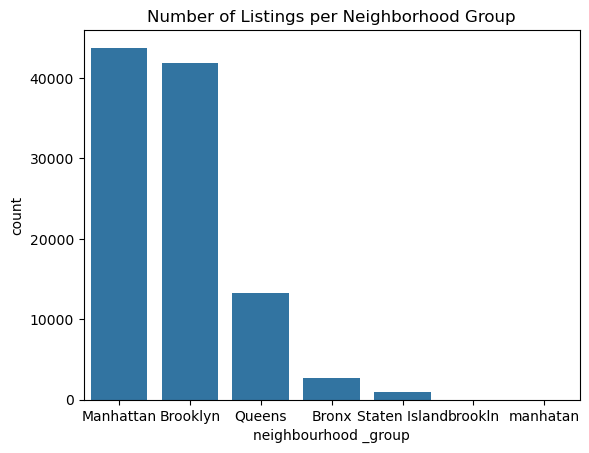

In [62]:
sns.countplot(data=df, x='neighbourhood _group', order=df['neighbourhood _group'].value_counts().index)
plt.title("Number of Listings per Neighborhood Group")
plt.show()

In [53]:
# ===================== Q3: Price Analysis =====================
avg_price = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)
print("\n===== Top 10 Neighborhoods by Average Price =====")
print(avg_price)


===== Top 10 Neighborhoods by Average Price =====
neighbourhood
New Dorp                  1045.000000
Chelsea, Staten Island    1042.000000
Fort Wadsworth            1024.000000
Little Neck                817.750000
Jamaica Hills              812.904762
Arden Heights              804.888889
Midland Beach              796.176471
Shore Acres                792.260870
Mill Basin                 775.142857
Riverdale                  768.736842
Name: price, dtype: float64


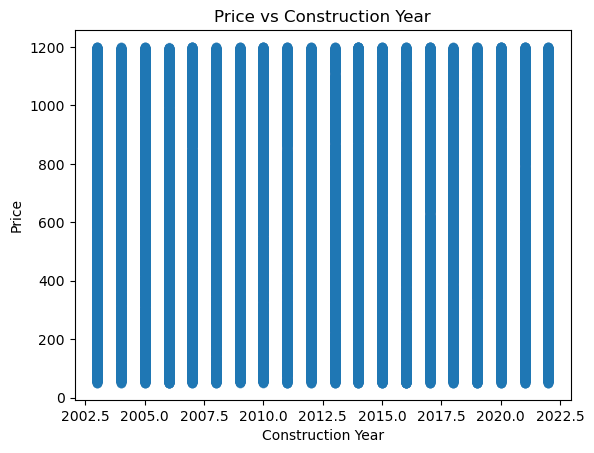

In [78]:
# ===================== Q4: Price vs Construction Year (if column exists) =====================
if 'year_constructed' in df.columns:
    plt.scatter(df['year_constructed'], df['price'], alpha=0.3)
    plt.xlabel("Construction Year")
    plt.ylabel("Price")
    plt.title("Price vs Construction Year")
    plt.show()

In [56]:
# ===================== Q5: Top Hosts by Listings =====================
top_hosts = df['host_id'].value_counts().head(10)
print("\n===== Top 10 Hosts by Listings =====")
print(top_hosts)


===== Top 10 Hosts by Listings =====
host_id
38729751923    2
3895711649     2
43698780331    2
83121548580    2
95831271296    2
22326090286    2
33983881137    2
59240106692    2
31012769204    2
60627453207    2
Name: count, dtype: int64


In [57]:
# ===================== Q6: Verified Hosts and Reviews =====================
if 'host_identity_verified' in df.columns:
    verified_reviews = df.groupby('host_identity_verified')['reviews_per_month'].mean()
    print("\n===== Avg Reviews per Month (Verified vs Non-Verified Hosts) =====")
    print(verified_reviews)


===== Avg Reviews per Month (Verified vs Non-Verified Hosts) =====
host_identity_verified
unconfirmed    1.372956
verified       1.374666
Name: reviews_per_month, dtype: float64


In [77]:
# ===================== Q7: Correlation Between Price and Service Fee =====================
if 'service_fee' in df.columns:
    correlation = df['price'].corr(df['service_fee'])
    print(f"\nCorrelation between Price and Service Fee: {correlation}")


Correlation between Price and Service Fee: 0.9999908755543351


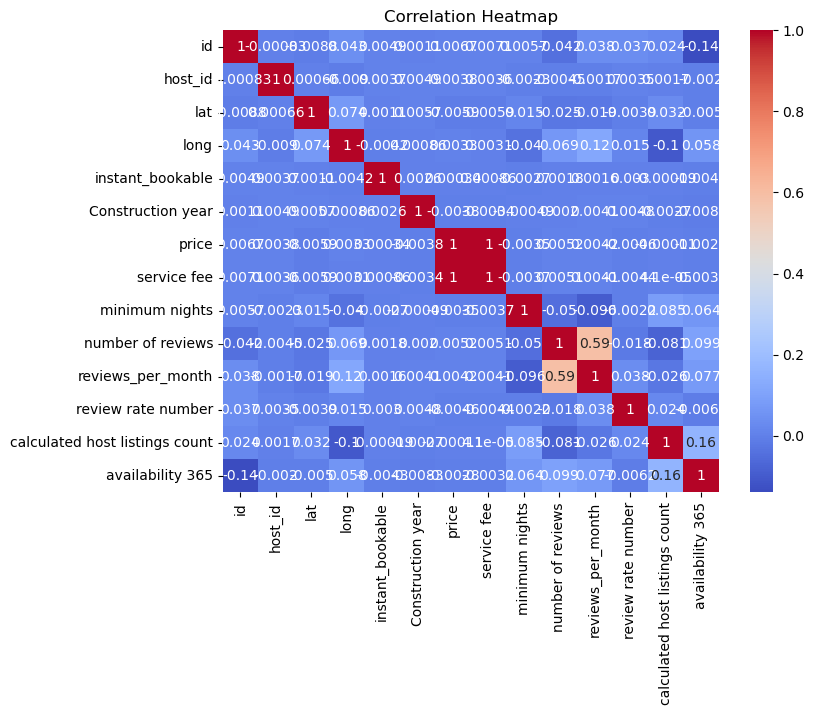


===== Analysis Completed =====


In [59]:
# ===================== EXTRA: Correlation Heatmap =====================
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

print("\n===== Analysis Completed =====")

In [76]:
print(df.columns.tolist())

['id', 'NAME', 'host_id', 'host_identity_verified', 'host name', 'neighbourhood _group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room_type', 'year_constructed', 'price', 'service_fee', 'minimum nights', 'number of reviews', 'last review', 'reviews_per_month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license']
